In [14]:
!git clone https://github.com/NSchrading/intro-spacy-nlp

Cloning into 'intro-spacy-nlp'...
remote: Enumerating objects: 21, done.
remote: Total 21 (delta 0), reused 0 (delta 0), pack-reused 21
Unpacking objects: 100% (21/21), 16.30 KiB | 333.00 KiB/s, done.


In [18]:
import os
os.chdir('/content/intro-spacy-nlp')

In [19]:
# 말뭉치 데이터셋
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
import pandas as pd
corpus = pd.DataFrame([
    {'id':_id,
     'text': reuters.raw(_id).replace('\n', ''),
     'label': reuters.categories(_id)}
    for _id in reuters.fileids()
    ])

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [21]:
import pandas as pd
corpus = pd.read_csv('/content/activitiynet_preprocessing_2.csv')
corpus

,Unnamed: 0.1,Unnamed: 0,video_id,video_path,duration,captions_starts,captions_ends,en_captions,subjects,objects,predicates
0,0,0,v_QOlSCBRmfWY,https://www.youtube.com/watch?v=QOlSCBRmfWY,82.730003,0.830000,19.860001,A young woman is seen standing in a room and l...,['woman'],"['room', 'dancing']",['seen']
1,1,1,v_QOlSCBRmfWY,https://www.youtube.com/watch?v=QOlSCBRmfWY,82.730003,17.370001,60.810001,The girl dances around the room while the cam...,"['girl', 'camera']","['room', 'movements']",['dances']
2,2,2,v_QOlSCBRmfWY,https://www.youtube.com/watch?v=QOlSCBRmfWY,82.730003,56.259998,79.419998,She continues dancing around the room and end...,['She'],"['room', 'floor']",['continues']
3,3,3,v_ehGHCYKzyZ8,https://www.youtube.com/watch?v=ehGHCYKzyZ8,61.720001,0.000000,2.780000,The video starts with a title logo sequence.,['video'],['sequence'],['starts']
4,4,4,v_ehGHCYKzyZ8,https://www.youtube.com/watch?v=ehGHCYKzyZ8,61.720001,3.090000,61.720001,A man and woman are in a living room demonstr...,['man'],['room'],['are']
...,...,...,...,...,...,...,...,...,...,...,...
3747,3747,3747,v_3XUxm78gjJE,https://www.youtube.com/watch?v=3XUxm78gjJE,143.279999,48.000000,50.860001,A person in a blue shirt falls down throwing ...,['person'],"['shirt', 'baseball']",['falls']
3748,3748,3748,v_3XUxm78gjJE,https://www.youtube.com/watch?v=3XUxm78gjJE,143.279999,102.449997,121.070000,The audience is dancing on the side of the fi...,['audience'],"['side', 'field']",['dancing']
3749,3749,3749,v_RclRzty0YVE,https://www.youtube.com/watch?v=RclRzty0YVE,100.470001,0.000000,29.639999,A person is seen standing on the beach with a ...,['person'],"['beach', 'ball', 'front', 'him', 'goal']",['seen']
3750,3750,3750,v_RclRzty0YVE,https://www.youtube.com/watch?v=RclRzty0YVE,100.470001,20.090000,70.830002,The person then kicks the ball several times ...,['person'],"['ball', 'goalie']",['kicks']


In [22]:
# 간단하게 정리
corpus['clean_text'] = corpus['en_captions'].apply(lambda x: x.replace('\n', ''))

In [ ]:
corpus.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace = True)

In [29]:
!pip install langdetect
from langdetect import detect
import numpy as np

In [31]:
# 모든 문서에 대한 언어 유추
def getLanguage(text: str):
  try:
    return detect(text)
  except:
    return np.nan

corpus['language'] = corpus['en_captions'].apply(detect)

In [32]:
from collections import Counter
Counter(corpus['language'])

Counter({'en': 3720,
         'nl': 10,
         'ro': 1,
         'da': 1,
         'af': 10,
         'ca': 1,
         'cy': 2,
         'id': 1,
         'sl': 1,
         'tl': 5})

In [33]:
!python -m spacy download en_core_web_sm

2023-07-11 11:51:06.457544: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:
import spacy
nlp = spacy.load('en_core_web_sm')
corpus['parsed'] = corpus['clean_text'].apply(nlp)
corpus

,video_id,video_path,duration,captions_starts,captions_ends,en_captions,subjects,objects,predicates,clean_text,language,parsed
0,v_QOlSCBRmfWY,https://www.youtube.com/watch?v=QOlSCBRmfWY,82.730003,0.830000,19.860001,A young woman is seen standing in a room and l...,['woman'],"['room', 'dancing']",['seen'],A young woman is seen standing in a room and l...,en,"(A, young, woman, is, seen, standing, in, a, r..."
1,v_QOlSCBRmfWY,https://www.youtube.com/watch?v=QOlSCBRmfWY,82.730003,17.370001,60.810001,The girl dances around the room while the cam...,"['girl', 'camera']","['room', 'movements']",['dances'],The girl dances around the room while the cam...,en,"( , The, girl, dances, around, the, room, whil..."
2,v_QOlSCBRmfWY,https://www.youtube.com/watch?v=QOlSCBRmfWY,82.730003,56.259998,79.419998,She continues dancing around the room and end...,['She'],"['room', 'floor']",['continues'],She continues dancing around the room and end...,en,"( , She, continues, dancing, around, the, room..."
3,v_ehGHCYKzyZ8,https://www.youtube.com/watch?v=ehGHCYKzyZ8,61.720001,0.000000,2.780000,The video starts with a title logo sequence.,['video'],['sequence'],['starts'],The video starts with a title logo sequence.,en,"(The, video, starts, with, a, title, logo, seq..."
4,v_ehGHCYKzyZ8,https://www.youtube.com/watch?v=ehGHCYKzyZ8,61.720001,3.090000,61.720001,A man and woman are in a living room demonstr...,['man'],['room'],['are'],A man and woman are in a living room demonstr...,en,"( , A, man, and, woman, are, in, a, living, ro..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3747,v_3XUxm78gjJE,https://www.youtube.com/watch?v=3XUxm78gjJE,143.279999,48.000000,50.860001,A person in a blue shirt falls down throwing ...,['person'],"['shirt', 'baseball']",['falls'],A person in a blue shirt falls down throwing ...,en,"( , A, person, in, a, blue, shirt, falls, down..."
3748,v_3XUxm78gjJE,https://www.youtube.com/watch?v=3XUxm78gjJE,143.279999,102.449997,121.070000,The audience is dancing on the side of the fi...,['audience'],"['side', 'field']",['dancing'],The audience is dancing on the side of the fi...,en,"( , The, audience, is, dancing, on, the, side,..."
3749,v_RclRzty0YVE,https://www.youtube.com/watch?v=RclRzty0YVE,100.470001,0.000000,29.639999,A person is seen standing on the beach with a ...,['person'],"['beach', 'ball', 'front', 'him', 'goal']",['seen'],A person is seen standing on the beach with a ...,en,"(A, person, is, seen, standing, on, the, beach..."
3750,v_RclRzty0YVE,https://www.youtube.com/watch?v=RclRzty0YVE,100.470001,20.090000,70.830002,The person then kicks the ball several times ...,['person'],"['ball', 'goalie']",['kicks'],The person then kicks the ball several times ...,en,"( , The, person, then, kicks, the, ball, sever..."


In [38]:
# spo 만들기
from subject_object_extraction import findSVOs
corpus['triplets'] = corpus['parsed'].apply(lambda x: findSVOs(x))
corpus['triplets']

0                                    []
1       [(camera, captures, movements)]
2                                    []
3                                    []
4                                    []
                     ...               
3747                                 []
3748                                 []
3749                                 []
3750            [(person, kicks, ball)]
3751                                 []
Name: triplets, Length: 3752, dtype: object

In [39]:
# 엣지 만들기
edge_list = pd.DataFrame([
    {
        'id':_id,
        'source': source.lower(),
        'target': target.lower(),
        'edge': edge.lower()
    }
    for _id, triplets in corpus['triplets'].iteritems()
    for (source, edge, target) in triplets
    ])
edge_list

<ipython-input-39-c35c83f5fae4>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _id, triplets in corpus['triplets'].iteritems()


,id,source,target,edge
0,1,camera,movements,captures
1,6,she,exercise,does
2,7,woman,ups,do
3,9,people,kitchen,moving
4,9,kitchen,tasks,performing
...,...,...,...,...
2737,3745,man,hairbrush,holds
2738,3745,guy,water,drinks
2739,3745,guy,toothbrush,holds
2740,3746,people,baseball,playing


In [40]:
# 지식기반 그래프 만들기
import networkx as nx
G = nx.from_pandas_edgelist(
    edge_list, "source", "target",
    edge_attr = True, create_using = nx.MultiDiGraph()
)

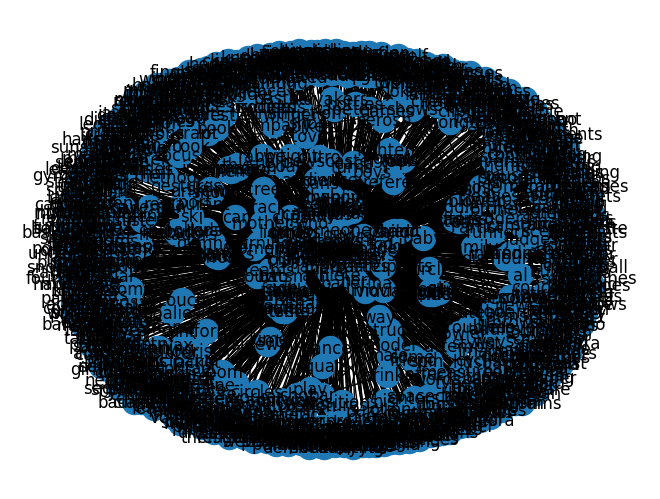

In [43]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels = True)
plt.show()

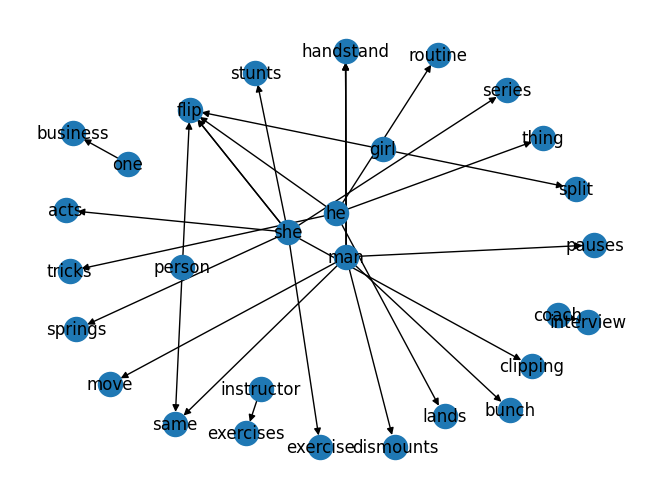

In [48]:
# 대출관계를 기반으로 하는 하위그래프
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(
    edge_list[edge_list['edge']=='does'], "source", "target",
    edge_attr = True, create_using = nx.MultiDiGraph()
)
nx.draw(G, with_labels = True)
plt.show()

In [50]:
edge_list[edge_list['edge']=='does']

,id,source,target,edge
1,6,she,exercise,does
136,210,one,business,does
380,556,man,move,does
381,557,man,handstand,does
382,557,man,pauses,does
459,660,man,handstand,does
460,662,man,handstand,does
461,662,man,dismounts,does
483,692,coach,interview,does
773,1114,she,springs,does


### 노드임베딩 방법


In [51]:
# node2vec
!pip install node2vec
import networkx as nx
from node2vec import Node2Vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [54]:
node2vec = Node2Vec(G, dimensions=2)
model1 = node2vec.fit(window=10)
embeddings = model1.wv.vectors
embeddings

Computing transition probabilities:   0%|          | 0/29 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 410.64it/s]


array([[-0.02695082,  0.01202304],
       [ 0.25523034,  0.45092985],
       [-0.46521807, -0.35575184],
       [ 0.3229177 ,  0.44863003],
       [-0.2507714 , -0.18816859],
       [ 0.36903745, -0.07630563],
       [-0.22708489,  0.3276557 ],
       [-0.24301584, -0.09084491],
       [ 0.14382899,  0.04959369],
       [-0.41426075, -0.4724409 ],
       [ 0.3655883 ,  0.2535131 ],
       [ 0.33786383,  0.03800163],
       [ 0.31754452, -0.1702683 ],
       [-0.04732007,  0.28842866],
       [-0.37608188, -0.19680518],
       [-0.37557912, -0.04650211],
       [ 0.47690594, -0.36595833],
       [-0.11681705, -0.09707441],
       [ 0.403775  , -0.2966465 ],
       [ 0.00225812, -0.2376867 ],
       [-0.48017752,  0.25036466],
       [-0.43846834, -0.21966606],
       [-0.001755  , -0.01480907],
       [-0.383062  ,  0.48073715],
       [ 0.24902181,  0.46172377],
       [-0.40789586,  0.22478992],
       [-0.2068538 ,  0.0412268 ],
       [ 0.4249527 , -0.22304991],
       [ 0.22597727,

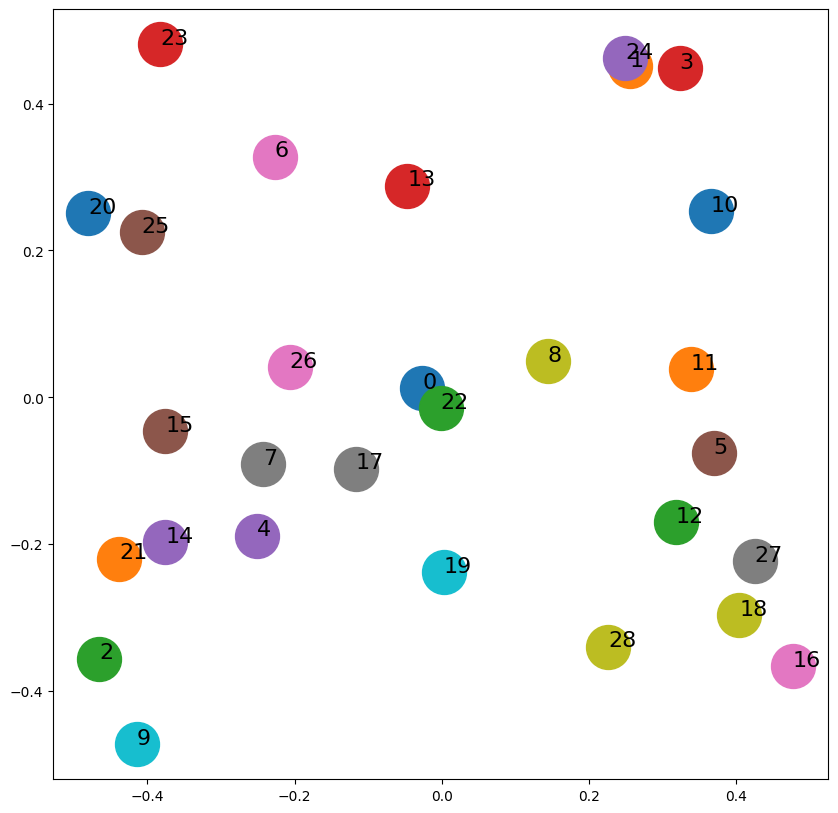

In [55]:
# 시각화
fig, ax = plt.subplots(figsize = (10, 10))
for i, vec in enumerate(embeddings):
  ax.scatter(vec[0], vec[1], s = 1000)
  ax.annotate(str(i), (vec[0], vec[1]), fontsize = 16)

In [61]:
E = edge_list[edge_list['edge']=='does']
E.reset_index()

,index,id,source,target,edge
0,1,6,she,exercise,does
1,136,210,one,business,does
2,380,556,man,move,does
3,381,557,man,handstand,does
4,382,557,man,pauses,does
5,459,660,man,handstand,does
6,460,662,man,handstand,does
7,461,662,man,dismounts,does
8,483,692,coach,interview,does
9,773,1114,she,springs,does
